<a href="https://colab.research.google.com/github/abhishekshah5486/classic-machine-learning/blob/main/lr_perceptron_trick_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [640]:
from sklearn.datasets import make_classification

In [641]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

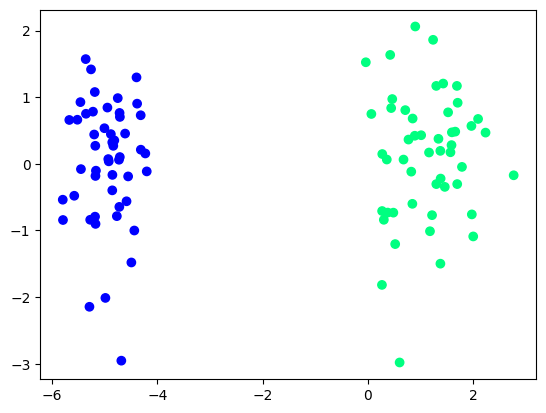

In [642]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

### Perceptron Code from Scratch ( Step Function )

In [643]:
class LogisticRegression():
  def __init__(self, learning_rate=0.1, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.dW = None
    self.db = None
    self.coef_ = None
    self.intercept_ = None

In [644]:
def perceptron(self, X, y):
  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])

  for i in range(self.max_iter):
    j = np.random.randint(0, X.shape[0] - 1)
    y_ = self.step(X[j], weights)
    weights = weights + self.learning_rate * (y[j] - y_) * X[j]

  self.coef_ = weights[1:,]
  self.intercept_ = weights[0]
  self.dW = self.coef_
  self.db = self.intercept_
  return self

LogisticRegression.perceptron = perceptron

In [645]:
def step(self, X, weights):
  y_ = np.dot(X, weights)
  if (y_ >= 0) : return 1
  return 0

LogisticRegression.step = step

In [646]:
lr = LogisticRegression(learning_rate=0.1, max_iter=1000)

In [647]:
lr.perceptron(X, y)

In [648]:
lr.coef_, lr.intercept_

(array([1.1204053 , 0.40381514]), 1.2000000000000002)

In [649]:
m = -(lr.coef_[0]/lr.coef_[1])
b = -(lr.intercept_/lr.coef_[1])

In [650]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

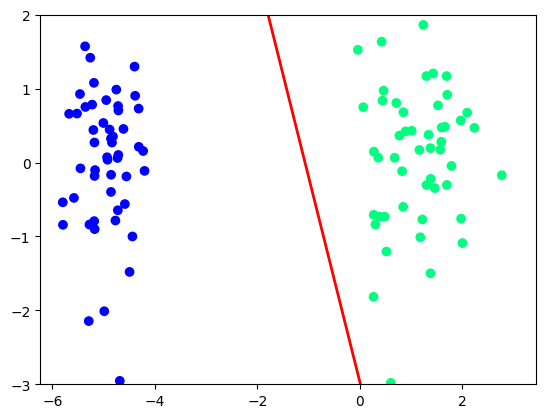

In [651]:
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

In [652]:
from sklearn.linear_model import LogisticRegression

### Perceptron code from scratch ( Signmoid Function )

In [653]:
class LogisticRegression():
  def __init__(self, learning_rate=0.1, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.dW = None
    self.db = None
    self.coef_ = None
    self.intercept_ = None

In [654]:
def perceptron(self, X, y):
  X = np.insert(X, 0, 1, axis=1)
  weights = np.ones(X.shape[1])

  for i in range(self.max_iter):
    j = np.random.randint(0, X.shape[0] - 1)
    y_ = self.sigmoid(X[j], weights)
    weights = weights + self.learning_rate * (y[j] - y_) * X[j]

  self.coef_ = weights[1:,]
  self.intercept_ = weights[0]
  self.dW = self.coef_
  self.db = self.intercept_
  return self

LogisticRegression.perceptron = perceptron

In [655]:
def sigmoid(self, X, weights):
  z = np.dot(X, weights)
  return 1 / (1 + np.exp(-z))

LogisticRegression.sigmoid = sigmoid

In [656]:
lr_sig = LogisticRegression(learning_rate=0.1, max_iter = 1000)

In [657]:
lr_sig.perceptron(X, y)

In [658]:
lr_sig.coef_

array([2.31890809, 0.13506809])

In [659]:
lr_sig.intercept_

2.6038758204297516

In [660]:
m = -(lr_sig.coef_[0]/lr_sig.coef_[1])
b = -(lr_sig.intercept_/lr_sig.coef_[1])

In [661]:
x_sig_input = np.linspace(-3,3,100)
y_sig_input = m*x_sig_input + b

(-3.0, 2.0)

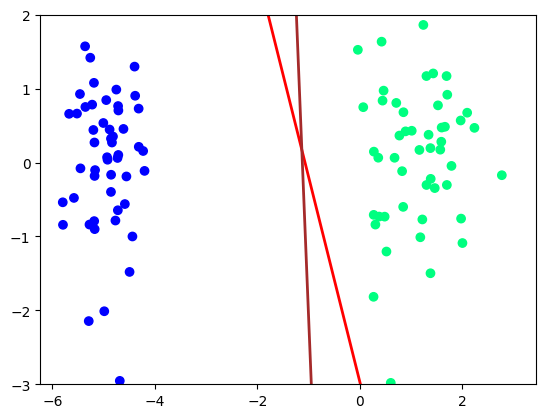

In [662]:
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.plot(x_sig_input, y_sig_input, color='brown', linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)

### Using Scikit Learn Logistic Regression

In [663]:
from sklearn.linear_model import LogisticRegression

In [664]:
lr = LogisticRegression(solver='sag')
lr.fit(X, y)

LogisticRegression(solver='sag')

In [665]:
lr.coef_

array([[1.76962298, 0.01261573]])

In [666]:
lr.intercept_

array([3.52887176])

In [667]:
m = -(lr.coef_[0][0]/lr.coef_[0][1])
b = -(lr.intercept_[0]/lr.coef_[0][1])

In [668]:
m, b

(-140.27111256395614, -279.71990180951076)

In [669]:
x_scikit_input = np.linspace(-3,3,100)
y_scikit_input = m*x_scikit_input + b

### Gradient Descent Logistic Regression Code from Scratch

In [670]:
class GDLogisticRegressor():
  def __init__(self, learning_rate=0.1, max_iter=100):
    self.learning_rate = learning_rate
    self.max_iter = max_iter
    self.coef_ = None
    self.intercept_ = None
    self.dW = None
    self.db = None


In [671]:
def fit(self, X, y):
  X = np.insert(X, 0, 1, axis=1)
  self.weights = np.ones(X.shape[1])
  for i in range(self.max_iter):
    y_pred = self.predict(X)
    self.weights = self.weights + (self.learning_rate * (y - y_pred).dot(X))/X.shape[0]

  self.coef_ = self.weights[1:,]
  self.intercept_ = self.weights[0]
  self.dW = self.coef_
  self.db = self.intercept_
  return self

GDLogisticRegressor.fit = fit

In [672]:
def predict(self, X):
  return self.sigmoid(np.dot(X, self.weights))

GDLogisticRegressor.predict = predict

In [673]:
def sigmoid(self, Z):
  return 1 / (1 + np.exp(-Z))

GDLogisticRegressor.sigmoid = sigmoid

In [674]:
lr_scikit = GDLogisticRegressor(learning_rate=0.5, max_iter=2500)

In [675]:
lr_scikit.fit(X, y)

In [676]:
lr_scikit.coef_

array([3.23213874, 0.1201336 ])

In [677]:
lr_scikit.intercept_

4.515959489477167

In [678]:
m = -(lr_scikit.coef_[0]/lr_scikit.coef_[1])
b = -(lr_scikit.intercept_/lr_scikit.coef_[1])

In [679]:
m, b

(-26.90453665531686, -37.591145491084006)

In [680]:
x_scikit2_input = np.linspace(-3,3,100)
y_scikit2_input = m*x_scikit2_input + b

(-3.0, 2.0)

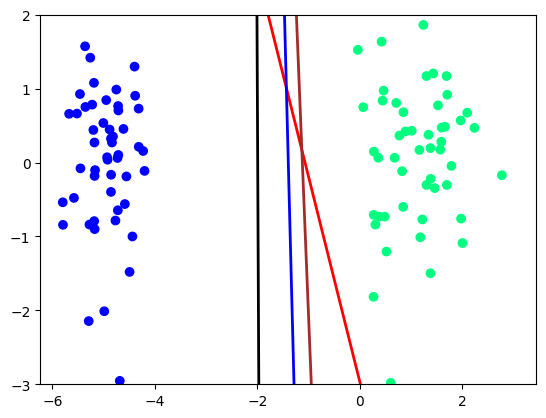

In [681]:
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.plot(x_scikit_input, y_scikit_input, color='black', linewidth=2)
plt.plot(x_scikit2_input, y_scikit2_input, color='blue', linewidth=2)
plt.plot(x_sig_input, y_sig_input, color='brown', linewidth=2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')
plt.ylim(-3,2)